## covid-19 Data exploration from data set available by John hopkins CSSE

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#import plotly.graph_objects as go
#from fbprophet import Prophet
import pycountry
#import plotly.express as px

# importing time series datasets of confirmed, recovered and deaths

In [9]:
dir_path = '.'
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
df_confirmed = pd.read_csv(url + 'time_series_covid19_confirmed_global.csv',error_bad_lines=False)  #( time_series_19-covid-Confirmed.csv)
df_recovered = pd.read_csv(url + 'time_series_covid19_recovered_global.csv',error_bad_lines=False) #pd.read_csv("time_series_19-covid-Recovered.csv")
df_deaths = pd.read_csv(url + 'time_series_covid19_deaths_global.csv',error_bad_lines=False) #pd.read_csv("time_series_19-covid-Deaths.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
#df = pd.read_csv(url, error_bad_lines=False)


In [10]:
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [11]:
df_confirmed=df_confirmed.groupby(["Country"]).sum()
df_confirmed=df_confirmed.drop(columns=['Lat','Long'])
df_recovered=df_recovered.groupby(["Country"]).sum()
df_recovered=df_recovered.drop(columns=['Lat','Long'])
df_deaths=df_deaths.groupby(["Country"]).sum()
df_deaths=df_deaths.drop(columns=['Lat','Long'])
df_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
Albania,0,0,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
Algeria,0,0,0,0,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
Andorra,0,0,0,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


# extracting top 60 infected countries

In [16]:
top_affected_countries=df_confirmed.sort_values(['3/26/20'],ascending=False).index[:63].values #20/20
top_affected_countries=np.delete(top_affected_countries,[62,59,58,57,55])

top_affected_countries

array(['US', 'China', 'Italy', 'Spain', 'Germany', 'France', 'Iran',
       'United Kingdom', 'Switzerland', 'Korea, South', 'Netherlands',
       'Austria', 'Belgium', 'Canada', 'Turkey', 'Portugal', 'Norway',
       'Brazil', 'Sweden', 'Australia', 'Israel', 'Malaysia', 'Denmark',
       'Czechia', 'Ireland', 'Luxembourg', 'Ecuador', 'Japan', 'Chile',
       'Poland', 'Pakistan', 'Thailand', 'Romania', 'Saudi Arabia',
       'Finland', 'South Africa', 'Indonesia', 'Greece', 'Russia',
       'Iceland', 'India', 'Diamond Princess', 'Philippines', 'Singapore',
       'Peru', 'Slovenia', 'Panama', 'Qatar', 'Estonia', 'Argentina',
       'Croatia', 'Egypt', 'Colombia', 'Dominican Republic', 'Mexico',
       'Serbia', 'United Arab Emirates', 'Lithuania'], dtype=object)

In [17]:
np.savetxt('top_affected_countries.txt',top_affected_countries, delimiter=" ", fmt="%s")

In [18]:
df_confirmed_top=df_confirmed.loc[top_affected_countries,:]
df_recovered_top=df_recovered.loc[top_affected_countries,:]
df_deaths_top=df_deaths.loc[top_affected_countries,:]
df_confirmed_top.to_csv('confirmed-data-top-affected-countries.csv')
df_confirmed_top.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
Country,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,7783,13677,19100,25489,33276,43847,53740,65778,83836,101657
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,81102,81156,81250,81305,81435,81498,81591,81661,81782,81897
Italy,0,0,0,0,0,0,0,0,0,2,...,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498
Spain,0,0,0,0,0,0,0,0,0,0,...,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719
Germany,0,0,0,0,0,1,4,4,4,5,...,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871


In [19]:
df_active_top=df_confirmed_top-df_recovered_top - df_deaths_top
df_active1_top=df_confirmed_top-df_recovered_top

df_active_top.to_csv('active-data-top-affected-countries.csv')
df_active1_top.to_csv('active1-data-top-affected-countries.csv')


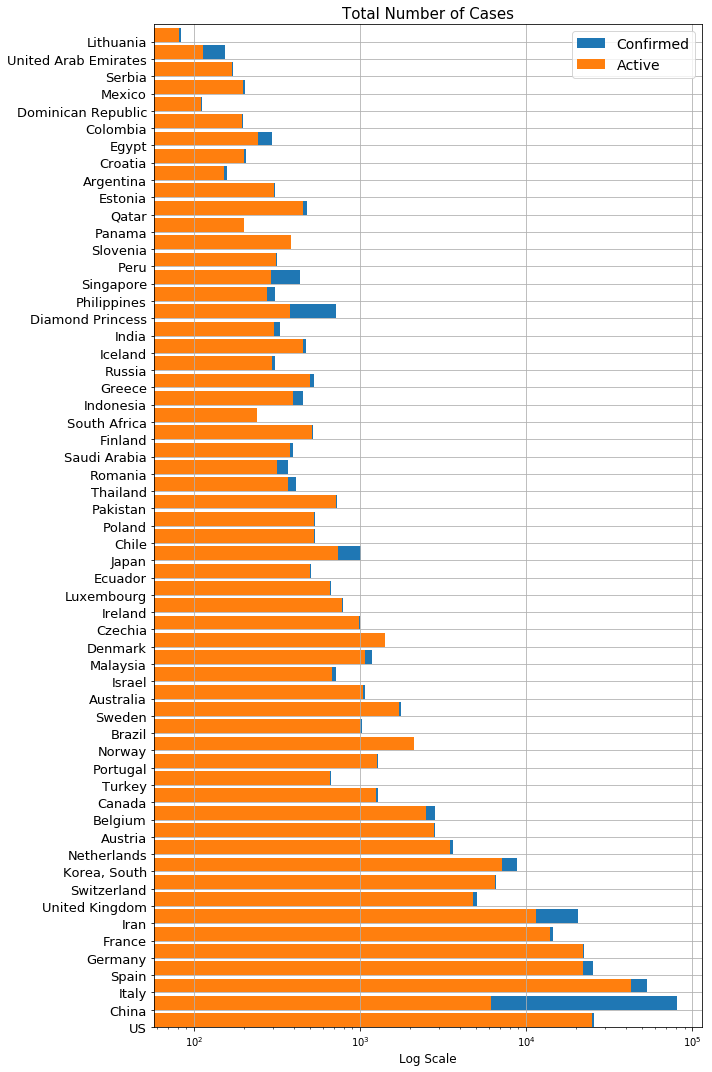

In [20]:
plt.figure(figsize=(10,15))
plt.title('Total Number of Cases',fontsize=15)
y_pos=np.arange(0,len(top_affected_countries))
p1 =plt.barh(y_pos,width=((df_confirmed_top['3/21/20'].values)),align='edge',label='Confirmed')
p1 =plt.barh(y_pos,width=((df_active_top['3/21/20'].values)),align='edge', label='Active')
plt.yticks(y_pos,top_affected_countries,rotation=0,fontsize=13)
plt.ylim(0,len(top_affected_countries))
plt.legend(fontsize=14)
plt.xlabel('Log Scale',fontsize=12)
plt.xscale('log')
plt.grid()
#plt.xlim([9e4,0])
plt.tight_layout()
plt.savefig('Confirmed_active_hor.png')
#pd.plotting.table(data=df_confirmed_top['3/21/20'])

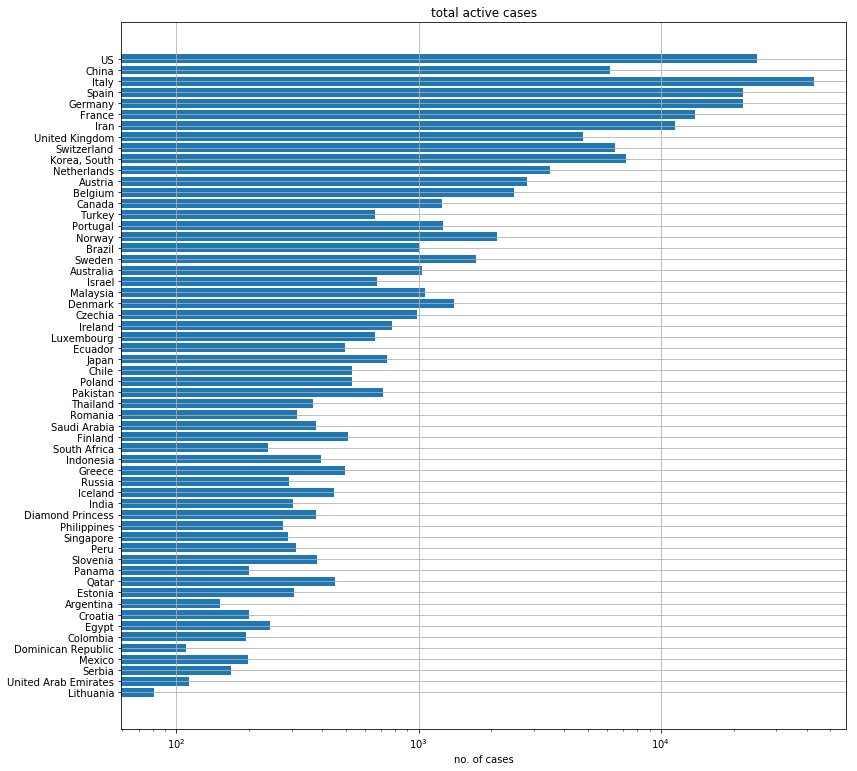

In [21]:
plt.figure(figsize=(13,13))
plt.title('total active cases')
plt.barh(np.flip(top_affected_countries),np.flip(df_active_top['3/21/20'].values))
plt.xlabel('no. of cases')
plt.xscale('log')
plt.grid()

In [22]:
confirmed_mat=df_confirmed_top.as_matrix()
deaths_mat=df_deaths_top.as_matrix()
recovered_mat=df_recovered_top.as_matrix()
active_mat = df_active_top.as_matrix()

/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


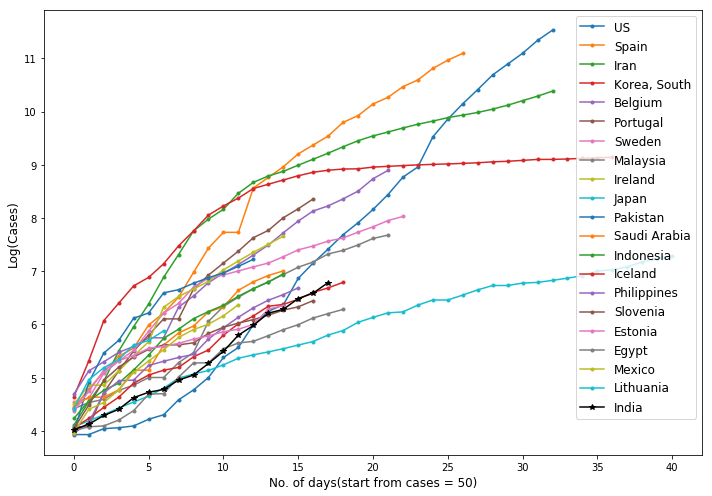

In [23]:
plt.figure(figsize=(10,7))
idx=np.where(top_affected_countries== 'India')[0][0]
[plt.plot(np.log(confirmed_mat[i,confirmed_mat[i,:]>50]),'.-',label=top_affected_countries[i]) for i in range(0,60,3)]
plt.plot(np.log(confirmed_mat[idx,confirmed_mat[idx,:]>50]),'k*-',label=top_affected_countries[idx])
plt.legend(fontsize=12)
plt.xlabel('No. of days(start from cases = 50)',fontsize=12)
plt.ylabel('Log(Cases)',fontsize=12)
#plt.yscale('log')
plt.tight_layout()
plt.savefig('timeseries.pdf')

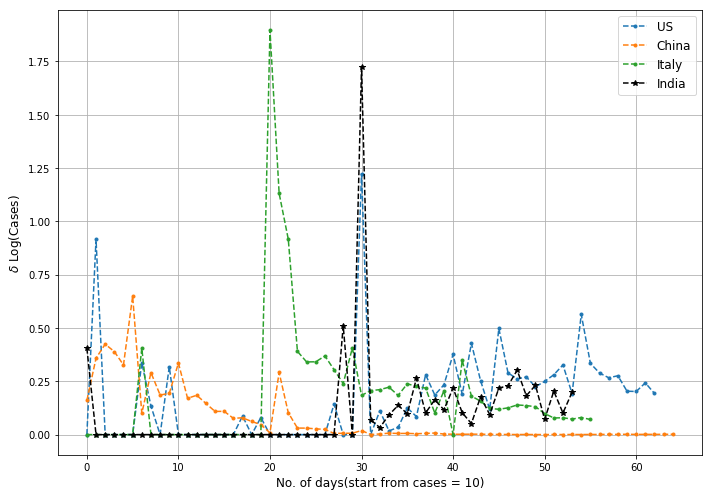

In [25]:
plt.figure(figsize=(10,7))
idx=np.where(top_affected_countries== 'India')[0][0]
[plt.plot(np.diff(np.log(confirmed_mat[i,confirmed_mat[i,:]>1])),'.--',label=top_affected_countries[i]) for i in range(0,3)]
plt.plot(np.diff(np.log(confirmed_mat[idx,confirmed_mat[idx,:]>1])),'k*--',label=top_affected_countries[idx])
plt.legend(fontsize=12)
plt.xlabel('No. of days(start from cases = 10)',fontsize=12)
plt.ylabel('$\delta$ Log(Cases)',fontsize=12)
plt.grid()
#plt.yscale('log')
plt.tight_layout()
plt.savefig('time_deriv.pdf')

In [26]:
def plot_cases(confirmed_mat,thr=5,top_affected_countries=top_affected_countries):
    l=len(top_affected_countries)
    india_idx=np.where(top_affected_countries== 'India')[0][0]
    plt.figure(figsize=(10,10))
    idx=np.where(confirmed_mat[india_idx,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[india_idx,idx.T]),'k.-',label=top_affected_countries[india_idx])
    for i in range(0,15):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'.-',label=top_affected_countries[i])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()
    plt.figure(figsize=(10,10))
    idx=np.where(confirmed_mat[india_idx,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[i,idx.T]),'k.-',label=top_affected_countries[india_idx])
    for i in range(15,28):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'.-',label=top_affected_countries[i])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()
    plt.figure(figsize=(10,10))
    idx=np.where(confirmed_mat[india_idx,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[india_idx,idx.T]),'k.-',label=top_affected_countries[india_idx])
    for i in range(28,40):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'.-',label=top_affected_countries[i])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()
    plt.figure(figsize=(10,10))
    for i in range(40,l):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'*-',label=top_affected_countries[i])
    idx=np.where(confirmed_mat[india_idx,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[india_idx,idx.T]),'k*-',label=top_affected_countries[india_idx])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()

confirmed_cases


/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


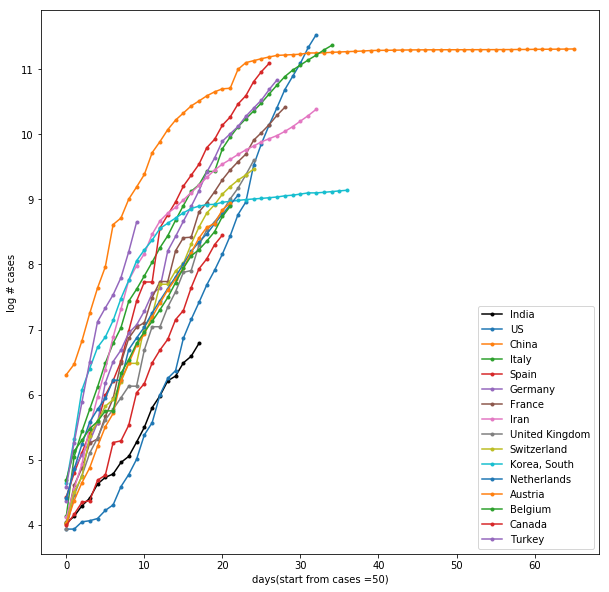

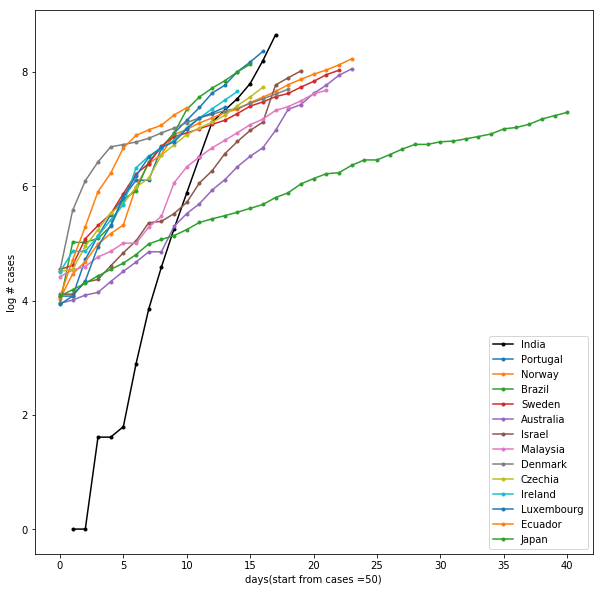

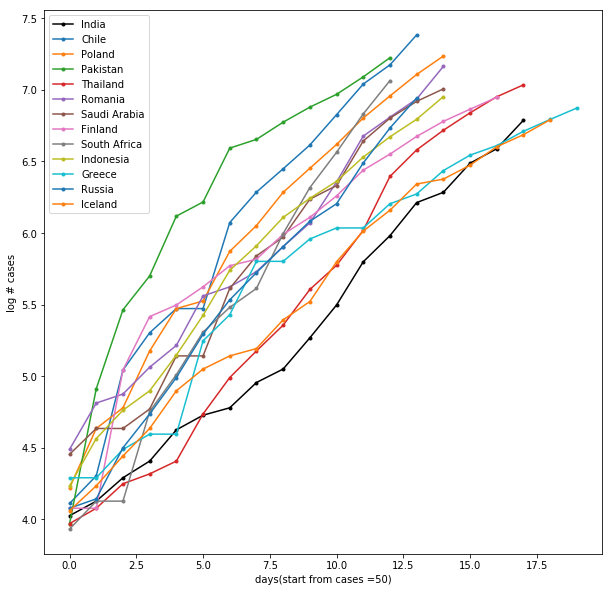

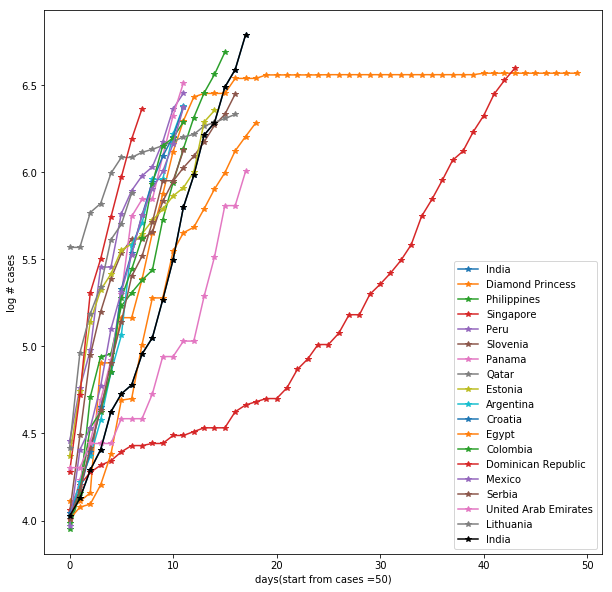

In [27]:
%matplotlib inline
print('confirmed_cases')
plot_cases(confirmed_mat,thr=50)

active_cases


/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


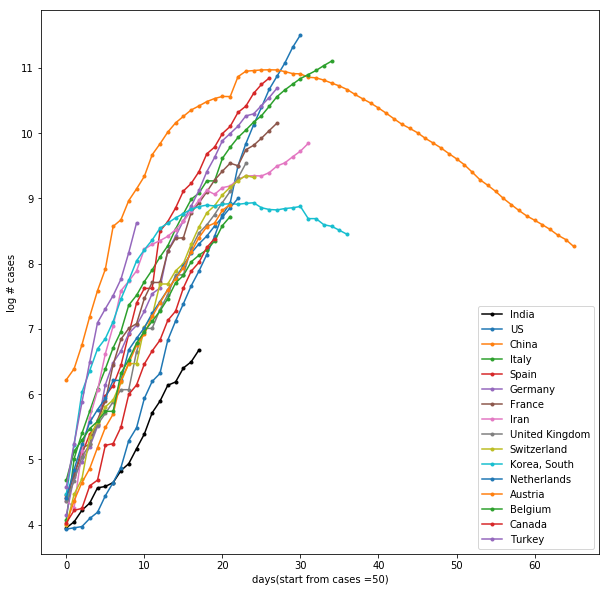

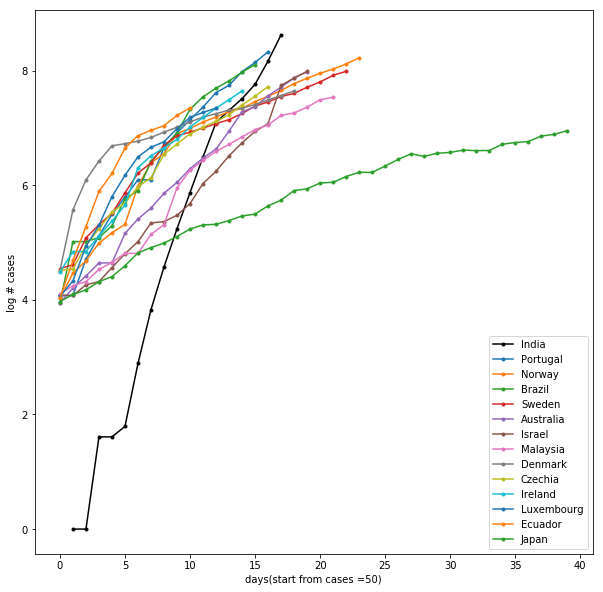

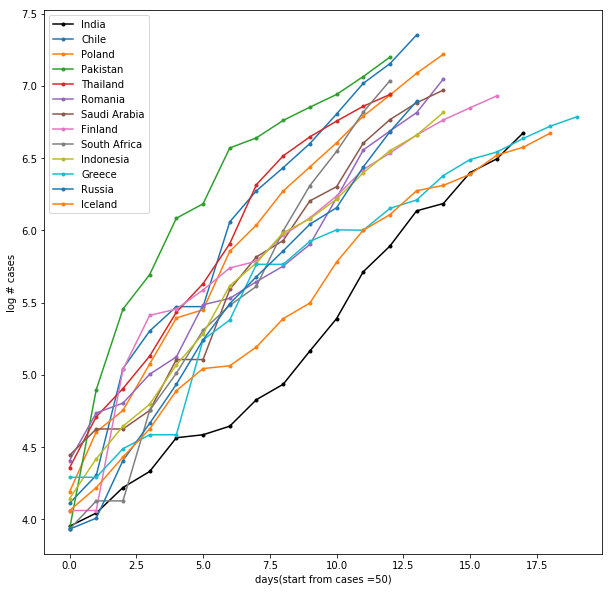

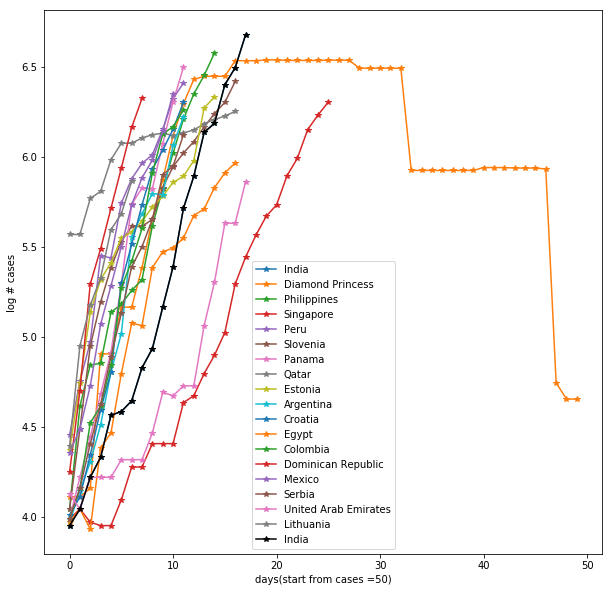

In [28]:
print('active_cases')
plot_cases(active_mat,thr=50)

In [16]:
#print('death_cases')
#plot_cases(deaths_mat,thr=1)

In [17]:
#print('recovered_cases')
#plot_cases(recovered_mat,thr=5)

# slope of log(#cases) v/s days: spread rate in logarithmic phase

In [29]:
def calc_slopes(confirmed_mat,thr=3,guess=1,extra=False):
    #slopes=np.zeros(50)
    l=len(top_affected_countries)
    fit_params = np.zeros([l,5])
    for i in range(l):
        idx=np.where(confirmed_mat[i,:]>=thr)[0]
        y = np.log(confirmed_mat[i,idx.T])
        if len(y)>0:
            x = np.arange(len(y))
            z, res, _, _, _ = np.polyfit(x, y, guess,full=True)
            #slopes[i]=z[0]
            fit_params[i,0]=z[0]
            fit_params[i,1]=z[1]
            fit_params[i,2]=idx[0]
            fit_params[i,3]= np.log(confirmed_mat[i,idx[0]])
            fit_params[i,4]=res                        
    return fit_params
    # p = np.poly1d(z)
    # fit = p(x)
  #  plt.figure()
  #  plt.hist(slopes,20,histtype='step')
  #  plt.xlabel('slope')
  #  print('mean,median = ',slopes.mean(),np.median(slopes))
  #  plt.figure(figsize=(30,10))
  #  plt.plot(slopes,'*-')
  #  plt.xticks(np.arange(0,50))
  #  plt.xlabel("Country")
  #  plt.ylabel("slope of log cases")
  #  plt.grid()
    

In [30]:
fit_params_confirmed=calc_slopes(confirmed_mat,thr=50)
fit_params_active=calc_slopes(active_mat,thr=50)

In [70]:
#confirmed cases 
def make_df_cases(fit_params_confirmed):
    confirmed_fit_df= pd.DataFrame()
    confirmed_fit_df['Country']=top_affected_countries
    confirmed_fit_df['slope(log cases)'] = fit_params_confirmed[:,0]
    confirmed_fit_df['start day'] = fit_params_confirmed[:,2].astype(int)
    confirmed_fit_df['start date']=df_confirmed_top.columns[confirmed_fit_df['start day']]
    confirmed_fit_df['intersecpt(log cases)'] = fit_params_confirmed[:,1]
    confirmed_fit_df['MSE fit'] = fit_params_confirmed[:,3]
    confirmed_fit_df['total cases'] =df_confirmed_top['3/25/20'].values
    confirmed_fit_df=confirmed_fit_df.sort_values('slope(log cases)')
    confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'China']
    confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'Korea, South']
    confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'Cruise Ship']
    #confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'United Arab Emirates']

    return confirmed_fit_df

# sorted from highest to lowest spread rate of confirm cases

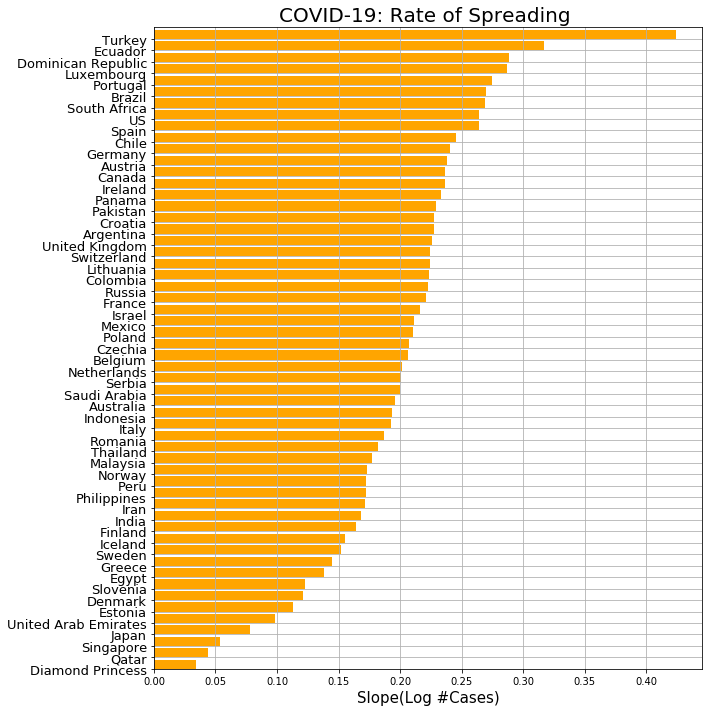

In [71]:
confirmed_fit_df=make_df_cases(fit_params_confirmed)
#confirmed_fit_df.to_csv(r'47_countries_confirmed_fit.csv', index = False)
plt.figure(figsize=(10,10))
plt.title('COVID-19: Rate of Spreading ',fontsize=20)
plt.xlabel('Slope(Log #Cases)',fontsize=15)
y_pos=np.arange(0,len(confirmed_fit_df['Country'].values))
plt.barh(y_pos,width=(confirmed_fit_df['slope(log cases)'].values),align='edge',color='orange')
plt.yticks(y_pos,(confirmed_fit_df['Country'].values),rotation=0,fontsize=13)
plt.ylim(0,len(confirmed_fit_df['Country'].values))
plt.tight_layout()
plt.grid()
plt.savefig('spread_rate_bar_hor.png')

In [33]:
# active cases
#active_fit_df=make_df_cases(fit_params_active)
#active_fit_df.to_csv(r'47_countries_active_fit.csv', index = False)
#active_fit_df

## Future Plans:
Case studies on: Singapore, Japan, Qatar, Bahrain, Estonia for their low spread rate(slope)
 
Case studies on: Portugal, Pakistan, Luxembourg, Turkey, Ecuador for their high spread rate(slope)

Fit slopes v/s : population density, temperature, humidity, economy, medical facilities, shutdown call, transport bans

# y predictions assuming exponential growth phase

In [72]:
def y_pred(active_fit_df, t_len=65):
    for day in range(t_len):
        active_fit_df['exp MSE'] = np.exp(active_fit_df['MSE fit'])
        active_fit_df['pred_day ' + str(day)] = np.exp(active_fit_df['slope(log cases)']*day + active_fit_df['intersecpt(log cases)'])
    return active_fit_df

In [73]:
#active_fit_df_y=y_pred(active_fit_df)
#active_fit_df_y.to_csv(r'47_countries_active_fit_y.csv', index = False)
confirmed_fit_df_y=y_pred(confirmed_fit_df)
#active_fit_df_y[active_fit_df_y.columns[7:]].as_matrix()
confirmed_fit_df_y

,Country,slope(log cases),start day,start date,intersecpt(log cases),MSE fit,total cases,exp MSE,pred_day 0,pred_day 1,...,pred_day 55,pred_day 56,pred_day 57,pred_day 58,pred_day 59,pred_day 60,pred_day 61,pred_day 62,pred_day 63,pred_day 64
41,Diamond Princess,0.034324,16,2/7/20,5.372459,4.110874,712,61.0,215.391830,222.913187,...,1.422619e+03,1.472296e+03,1.523708e+03,1.576915e+03,1.631980e+03,1.688968e+03,1.747945e+03,1.808983e+03,1.872151e+03,1.937526e+03
47,Qatar,0.044319,49,3/11/20,5.708483,5.568345,537,262.0,301.413551,315.072343,...,3.449656e+03,3.605980e+03,3.769388e+03,3.940201e+03,4.118754e+03,4.305398e+03,4.500501e+03,4.704445e+03,4.917630e+03,5.140477e+03
43,Singapore,0.053634,21,2/12/20,3.858740,3.912023,631,50.0,47.405563,50.017535,...,9.056142e+02,9.555122e+02,1.008159e+03,1.063707e+03,1.122316e+03,1.184154e+03,1.249399e+03,1.318239e+03,1.390872e+03,1.467507e+03
27,Japan,0.078300,25,2/16/20,4.380995,4.077537,1307,59.0,79.917526,86.426607,...,5.928444e+03,6.411301e+03,6.933485e+03,7.498200e+03,8.108909e+03,8.769360e+03,9.483602e+03,1.025602e+04,1.109134e+04,1.199471e+04
56,United Arab Emirates,0.098275,48,3/10/20,4.097129,4.304065,333,74.0,60.167284,66.380532,...,1.338992e+04,1.477265e+04,1.629816e+04,1.798121e+04,1.983806e+04,2.188666e+04,2.414682e+04,2.664037e+04,2.939142e+04,3.242656e+04
48,Estonia,0.113388,51,3/13/20,4.786906,4.369448,404,79.0,119.929750,134.329326,...,6.128327e+04,6.864135e+04,7.688290e+04,8.611398e+04,9.645341e+04,1.080343e+05,1.210056e+05,1.355343e+05,1.518075e+05,1.700345e+05
22,Denmark,0.121261,47,3/9/20,5.757916,4.521789,1862,92.0,316.687799,357.514992,...,2.495125e+05,2.816795e+05,3.179934e+05,3.589889e+05,4.052695e+05,4.575166e+05,5.164994e+05,5.830862e+05,6.582573e+05,7.431194e+05
45,Slovenia,0.122817,49,3/11/20,4.641660,4.043051,528,57.0,103.716398,117.269771,...,8.901707e+04,1.006496e+05,1.138022e+05,1.286735e+05,1.454882e+05,1.645002e+05,1.859967e+05,2.103022e+05,2.377839e+05,2.688569e+05
51,Egypt,0.138513,47,3/9/20,3.958966,4.007333,456,55.0,52.403099,60.188356,...,1.066376e+05,1.224802e+05,1.406764e+05,1.615760e+05,1.855805e+05,2.131512e+05,2.448180e+05,2.811893e+05,3.229641e+05,3.709453e+05
37,Greece,0.144351,46,3/8/20,4.379427,4.290459,821,73.0,79.792280,92.183143,...,2.238442e+05,2.586048e+05,2.987633e+05,3.451579e+05,3.987571e+05,4.606797e+05,5.322182e+05,6.148658e+05,7.103477e+05,8.206569e+05


In [74]:
#confirmed_mat_y=confirmed_fit_df_y[confirmed_fit_df_y.columns[7:]].as_matrix()
#plot_cases(confirmed_mat_y,thr=0,top_affected_countries=confirmed_fit_df_y['Country'].values)

In [75]:
temp_df=pd.read_csv('training_data_with_weather_info_week_1.csv')
temp=temp_df.groupby(['Country/Region']).mean()['temp']
confirmed_fit_df_y['temp'] = temp[confirmed_fit_df_y['Country'].values].values
confirmed_fit_df_y.to_csv(r'top_countries_confirmed_fit_y.csv', index = False)

(0.05, 0.3)

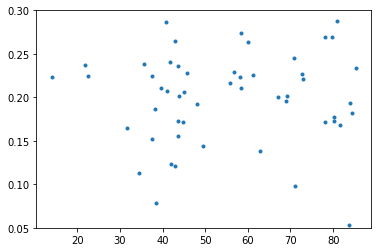

In [81]:
plt.plot(confirmed_fit_df_y['temp'],confirmed_fit_df_y['slope(log cases)'],'.')
plt.ylim(.05,.3)

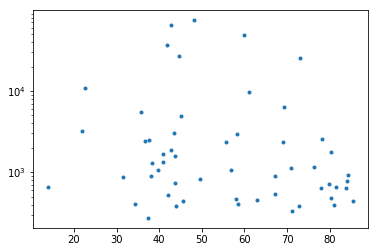

In [80]:
plt.plot(confirmed_fit_df_y['temp'],confirmed_fit_df_y['total cases'],'.')
plt.yscale('log')

In [96]:
df_pop=pd.read_csv("../SIER-SIR/population_by_country_2020.csv")
df_pop.head()
#population=df_pop[df_pop["Country (or dependency)"]=='Italy']["Population (2020)"].values[0]

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%


In [90]:
common_countries=np.intersect1d(df_pop["Country (or dependency)"].values, top_affected_countries)

In [121]:
pop=df_pop.groupby(['Country (or dependency)']).sum()['Population (2020)']
dens=df_pop.groupby(['Country (or dependency)']).sum()['Density (P/Km²)']

In [122]:
confirmed_fit_df_y['Population']=pop[confirmed_fit_df_y['Country'].values].values
confirmed_fit_df_y['Population Density']=dens[confirmed_fit_df_y['Country'].values].values


In [123]:
confirmed_fit_df_y.to_csv(r'top_countries_confirmed_fit_y.csv', index = False)#Korea,south US czechia Diamond Princess

(0, 600)

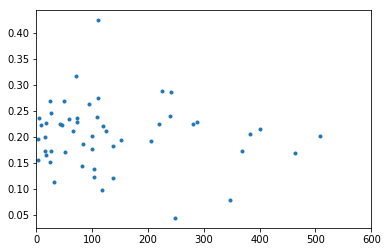

In [127]:
plt.plot(confirmed_fit_df_y['Population Density'],confirmed_fit_df_y['slope(log cases)'],'.')
plt.xlim(0,600)

(0, 400)

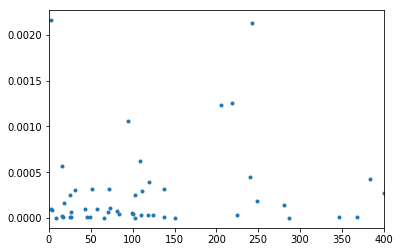

In [129]:
plt.plot(confirmed_fit_df_y['Population Density'],confirmed_fit_df_y['total cases']/confirmed_fit_df_y['Population'],'.')
plt.xlim(0,400)

In [ ]:
# find linear correlations.